In [3]:
# https://github.com/pdollar/coco/blob/master/PythonAPI/pycocoDemo.ipynb
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [7]:
# Folder structure
# coco
# ├── annotations
# ├── common
# ├── LuaAPI
# ├── MatlabAPI
# ├── PythonAPI
# ├── results
# └── train2014

dataDir='/Users/niz/lab/coco'
dataType='train2014'
annFile='%s/annotations/instances_%s.json'%(dataDir,dataType)

In [9]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=19.92s)
creating index...
index created!


In [10]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print 'COCO categories: \n\n', ' '.join(nms)

nms = set([cat['supercategory'] for cat in cats])
print 'COCO supercategories: \n', ' '.join(nms)

COCO categories: 

person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush
COCO supercategories: 
outdoor food indoor appliance sports person animal vehicle furniture accessory electronic kitchen


In [11]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print img

{u'license': 2, u'file_name': u'COCO_train2014_000000556149.jpg', u'coco_url': u'http://mscoco.org/images/556149', u'height': 360, u'width': 640, u'date_captured': u'2013-11-19 23:15:28', u'flickr_url': u'http://farm7.staticflickr.com/6201/6063388134_ff71933213_z.jpg', u'id': 556149}


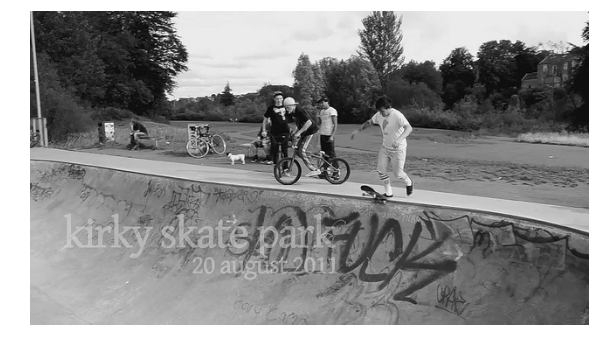

In [12]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread('http://mscoco.org/images/%d'%(img['id']))
plt.figure(); plt.axis('off')
plt.imshow(I)
plt.show()

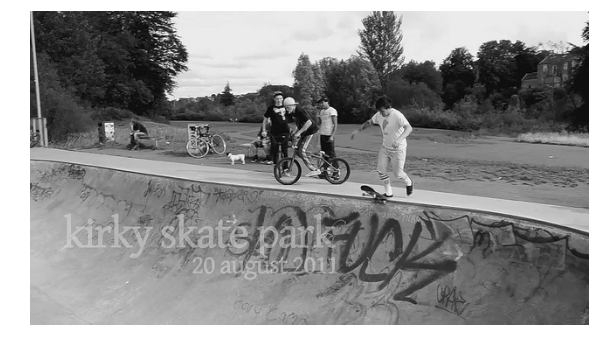

In [13]:
# display image on local storage
import cv2, numpy as np
def loadMyLocal(filename):
    img_filename = '%s/%s/%s'%(dataDir, dataType, filename)
    return cv2.cvtColor(cv2.imread(img_filename), cv2.COLOR_BGR2RGB)
plt.figure(); plt.axis('off')
img_data = loadMyLocal(img['file_name'])
plt.imshow(img_data)
plt.show()

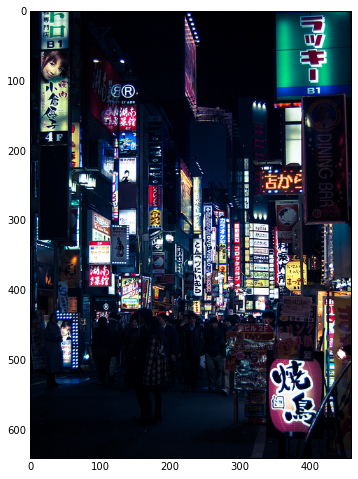

In [14]:
plt.imshow(loadMyLocal('COCO_train2014_000000000901.jpg'))
plt.show()

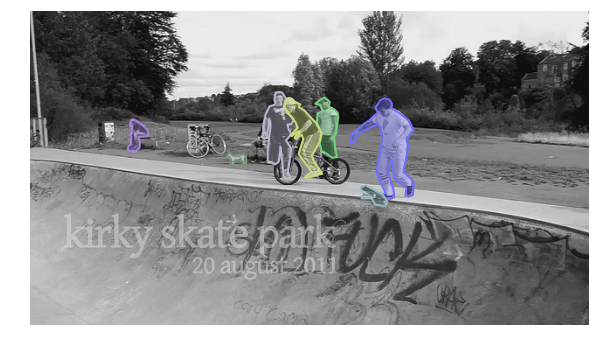

In [15]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [16]:
# initialize COCO api for person keypoints annotations
annFile = '%s/annotations/person_keypoints_%s.json'%(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=17.64s)
creating index...
index created!


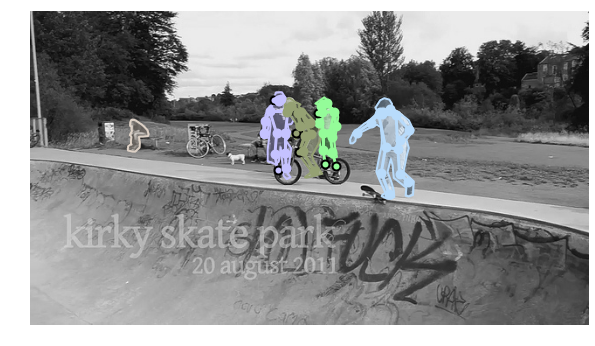

In [17]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [18]:
# initialize COCO api for caption annotations
annFile = '%s/annotations/captions_%s.json'%(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=2.45s)
creating index...
index created!


Black and white photograph of people with bicycles and skateboards next to a ramp.
A group of kids on a skateboard and a bike on a ramp.
A guy on a skate board at the top of a ramp.
people skating and other on a bike trying to jump on ahill
Four people standing at a skate on bikes and skateboards.


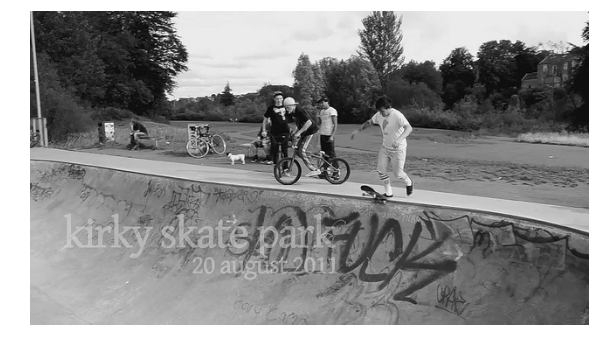

In [19]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off')
plt.show()

In [39]:
catPsnIds = coco.getCatIds(catNms=['person']);

In [40]:
ids = coco.getImgIds(catIds=catPsnIds);
print len(imgIds)," images."
img_fns = []
for id in imgIds:
    img_fns.append(coco.loadImgs(id)[0]['file_name'])
print img_fns

49  images.
[u'COCO_train2014_000000379520.jpg', u'COCO_train2014_000000461632.jpg', u'COCO_train2014_000000046978.jpg', u'COCO_train2014_000000089350.jpg', u'COCO_train2014_000000055809.jpg', u'COCO_train2014_000000306440.jpg', u'COCO_train2014_000000076937.jpg', u'COCO_train2014_000000022796.jpg', u'COCO_train2014_000000441470.jpg', u'COCO_train2014_000000410005.jpg', u'COCO_train2014_000000172310.jpg', u'COCO_train2014_000000380724.jpg', u'COCO_train2014_000000557721.jpg', u'COCO_train2014_000000022427.jpg', u'COCO_train2014_000000365340.jpg', u'COCO_train2014_000000363549.jpg', u'COCO_train2014_000000162396.jpg', u'COCO_train2014_000000354721.jpg', u'COCO_train2014_000000047909.jpg', u'COCO_train2014_000000125351.jpg', u'COCO_train2014_000000312233.jpg', u'COCO_train2014_000000304173.jpg', u'COCO_train2014_000000560561.jpg', u'COCO_train2014_000000088754.jpg', u'COCO_train2014_000000429236.jpg', u'COCO_train2014_000000055478.jpg', u'COCO_train2014_000000536244.jpg', u'COCO_train201

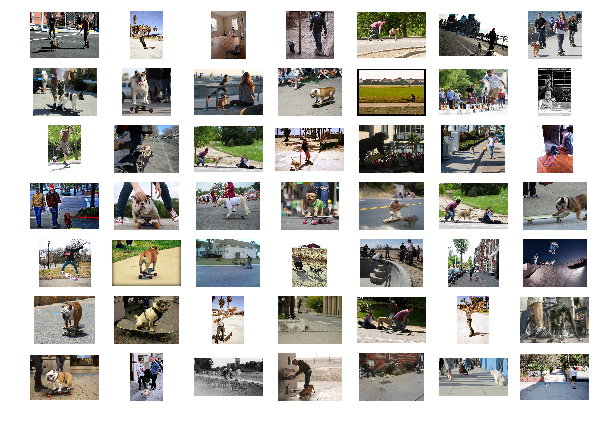

In [41]:
for i, name in enumerate(img_fns):
    plt.subplot(8, 7, i+1)
    plt.axis('off')
    plt.imshow(loadMyLocal(name))
plt.show()